# The Plan about composition of Models
- datasets, pixel_size, batch_size, epoch, exaggerate, stairs of hidden uint

1. datasets : front(1000), window(1000)
2. epoch : 10, 50, 100, 200, 300, 500, 1000
3. exaggerate : 적당히
4. hidden unit : conv2d, maxpooling(2x2, 4x4, 6x6, 8x8, 10x10), dense(2, 4, 8, 16, 32, 64, 128, 256)


## Import modules

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

np.random.seed(5)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# testing time

## 1. front 1000 (60x130)
- time per epoch = 30s

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
    'car_image/rotation_front_1000/train',
    target_size = (60, 130),
    batch_size = 100,
    class_mode = 'categorical',)  

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'car_image/rotation_front_1000/test',
    target_size = (60, 130), # 120, 265 original
    batch_size = 5,
    class_mode = 'categorical')

# model
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5),
                 activation = 'relu',
                 input_shape = (60, 130, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(12, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

hist_front100_epoch100 = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 10)

Found 10512 images belonging to 12 classes.
Found 1500 images belonging to 12 classes.
Epoch 1/10
10/10 [==============================] - 8s 763ms/step - loss: 2.1182 - acc: 0.3200 - val_loss: 1.4552 - val_acc: 0.4400
Epoch 2/10
10/10 [==============================] - 7s 701ms/step - loss: 0.8695 - acc: 0.8100 - val_loss: 0.3935 - val_acc: 0.9000
Epoch 3/10
10/10 [==============================] - 7s 730ms/step - loss: 0.1967 - acc: 0.9670 - val_loss: 0.1025 - val_acc: 0.9600
Epoch 4/10
10/10 [==============================] - 8s 780ms/step - loss: 0.0398 - acc: 0.9990 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 5/10
10/10 [==============================] - 9s 890ms/step - loss: 0.0250 - acc: 0.9970 - val_loss: 0.0160 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 7s 743ms/step - loss: 0.0132 - acc: 0.9980 - val_loss: 0.0312 - val_acc: 0.9800
Epoch 7/10
10/10 [==============================] - 7s 727ms/step - loss: 0.0152 - acc: 0.9970 - val_loss: 0.0209 - val_a

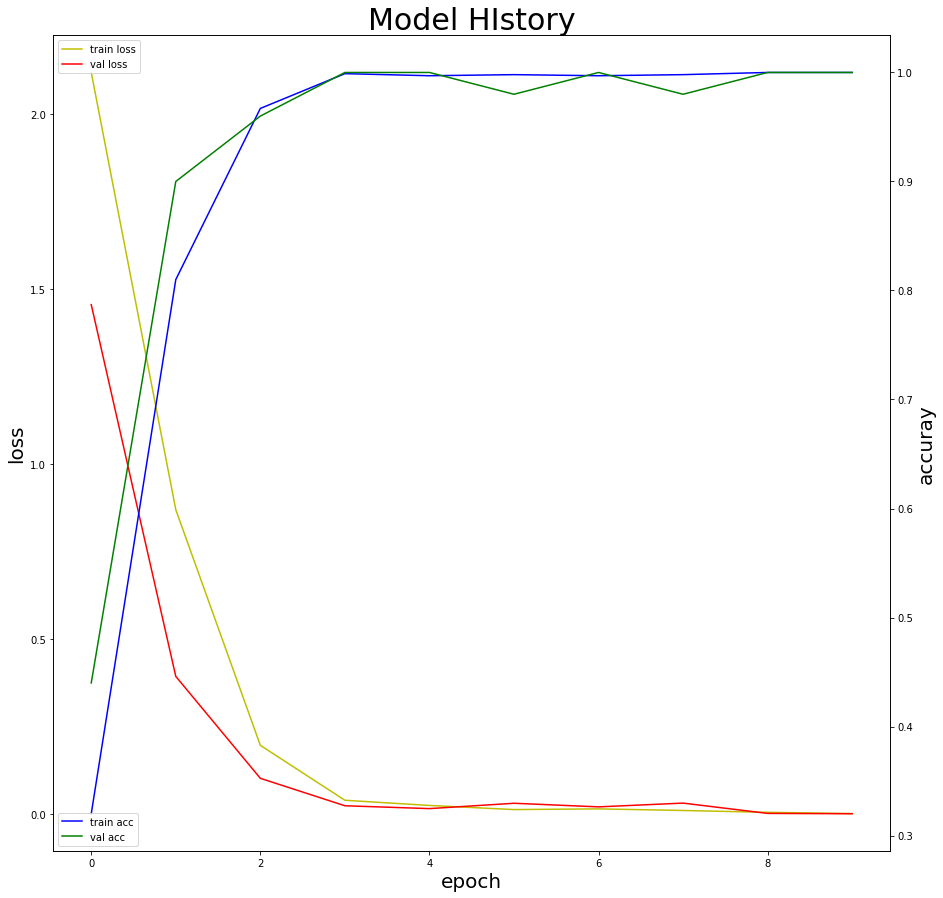

-- Evaluation --
acc : 100.00%


In [22]:
hist = hist_front100_epoch100

fig, loss_ax = plt.subplots(figsize = (15,15))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch', fontsize = 20)
loss_ax.set_ylabel('loss', fontsize = 20)
acc_ax.set_ylabel('accuray', fontsize = 20)

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title('Model HIstory', fontsize = 30)
plt.savefig('Keras.jpg')
plt.show()

print('-- Evaluation --')
scores = model.evaluate_generator(test_generator, steps = 3)
print('%s : %0.2f%%' %(model.metrics_names[1], scores[1]*100))

## 2. front 1000(120, 260)
- time per epoch = 3h

# 3. Front 1000
- deep hidden layers

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
    'car_image/rotation_front_1000/train',
    target_size = (60, 130),
    batch_size = 10,
    class_mode = 'categorical',)  

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'car_image/rotation_front_1000/test',
    target_size = (60, 130), # 120, 265 original
    batch_size = 5,
    class_mode = 'categorical')

# model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (60, 130, 3)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(12, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

hist_front100_epoch100 = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 3,
    validation_data = test_generator,
    validation_steps = 100)

In [ ]:
hist = hist_front100_epoch100

fig, loss_ax = plt.subplots(figsize = (15,15))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch', fontsize = 20)
loss_ax.set_ylabel('loss', fontsize = 20)
acc_ax.set_ylabel('accuray', fontsize = 20)

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title('Model HIstory', fontsize = 30)
plt.savefig('Keras.jpg')
plt.show()

print('-- Evaluation --')
scores = model.evaluate_generator(test_generator, steps = 3)
print('%s : %0.2f%%' %(model.metrics_names[1], scores[1]*100))

# 4. window 1000

Found 12012 images belonging to 12 classes.
Found 18 images belonging to 12 classes.
Epoch 1/10
10/10 [==============================] - 3s 282ms/step - loss: 2.3775 - acc: 0.1600 - val_loss: 2.7814 - val_acc: 0.1600
Epoch 2/10
10/10 [==============================] - 2s 209ms/step - loss: 1.9838 - acc: 0.4100 - val_loss: 2.9933 - val_acc: 0.1100
Epoch 3/10
10/10 [==============================] - 2s 187ms/step - loss: 1.1046 - acc: 0.7400 - val_loss: 4.8167 - val_acc: 0.0700
Epoch 4/10
10/10 [==============================] - 2s 190ms/step - loss: 0.3008 - acc: 0.9400 - val_loss: 8.0086 - val_acc: 0.0900
Epoch 5/10
10/10 [==============================] - 2s 192ms/step - loss: 0.2722 - acc: 0.9100 - val_loss: 9.2895 - val_acc: 0.0900
Epoch 6/10
10/10 [==============================] - 2s 199ms/step - loss: 0.2080 - acc: 0.9500 - val_loss: 9.4256 - val_acc: 0.0700
Epoch 7/10
10/10 [==============================] - 2s 199ms/step - loss: 0.0706 - acc: 0.9900 - val_loss: 8.7189 - val_acc

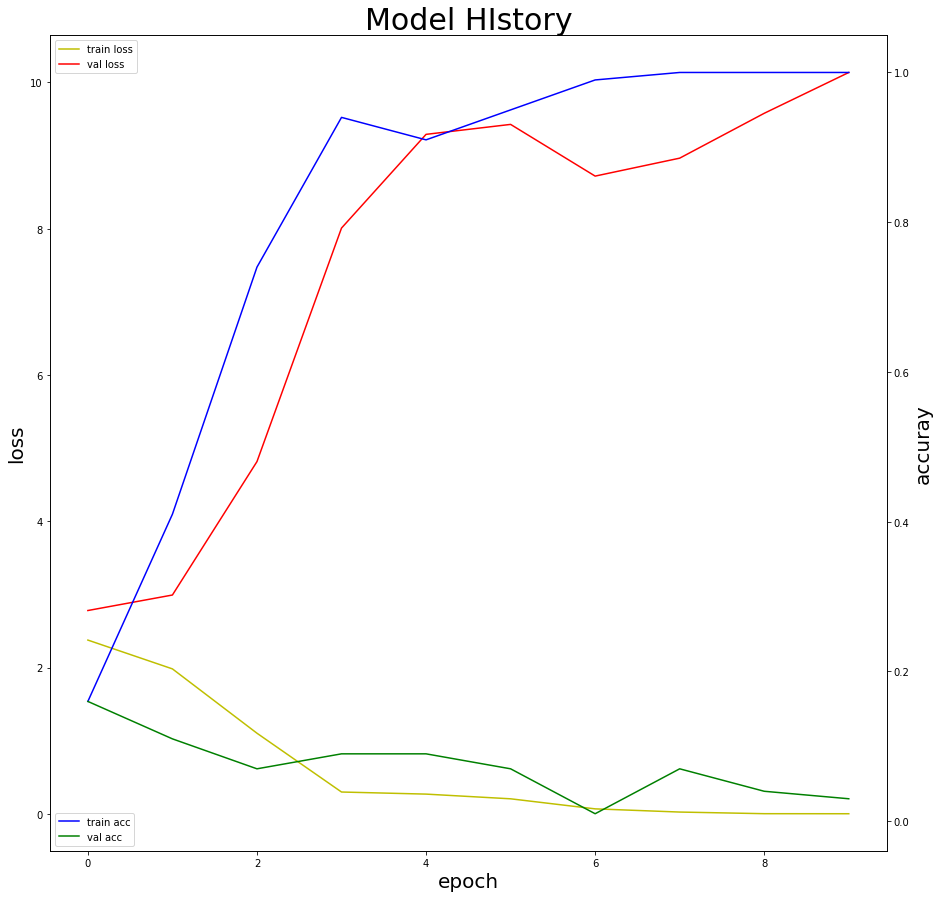

-- Evaluation --
acc : 0.00%


In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
    'car_image/rotation_window_1000/train',
    target_size = (30, 60),
    batch_size = 10,
    class_mode = 'categorical',)  

test_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
test_generator = test_datagen.flow_from_directory(
    'car_image/rotation_front_1000/test2',
    target_size = (30, 60), # 120, 265 original
    batch_size = 1,
    class_mode = 'categorical')

# model
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5),
                 activation = 'relu',
                 input_shape = (30, 60, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(12, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

hist_front100_epoch100 = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 100)

hist = hist_front100_epoch100

fig, loss_ax = plt.subplots(figsize = (15,15))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch', fontsize = 20)
loss_ax.set_ylabel('loss', fontsize = 20)
acc_ax.set_ylabel('accuray', fontsize = 20)

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title('Model HIstory', fontsize = 30)
plt.savefig('Keras.jpg')
plt.show()

print('-- Evaluation --')
scores = model.evaluate_generator(test_generator, steps = 3)
print('%s : %0.2f%%' %(model.metrics_names[1], scores[1]*100))

# edge

In [40]:
train_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
    'car_image/edge_1000/train',
    target_size = (30, 60),
    batch_size = 10,
    class_mode = 'categorical',)  

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'car_image/edge_1000/test',
    target_size = (30, 60), # 120, 265 original
    batch_size = 5,
    class_mode = 'categorical')

Found 2625 images belonging to 3 classes.
Found 375 images belonging to 3 classes.


In [41]:
# model
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5),
                 activation = 'relu',
                 input_shape = (30,60, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

hist_front100_epoch100 = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 10)

Epoch 1/10
10/10 [==============================] - 2s 201ms/step - loss: 1.1979 - acc: 0.2800 - val_loss: 1.0548 - val_acc: 0.6800
Epoch 2/10
10/10 [==============================] - 1s 111ms/step - loss: 1.0169 - acc: 0.7700 - val_loss: 1.0228 - val_acc: 0.3000
Epoch 3/10
10/10 [==============================] - 1s 133ms/step - loss: 0.8348 - acc: 0.6900 - val_loss: 0.5529 - val_acc: 0.9000
Epoch 4/10
10/10 [==============================] - 1s 135ms/step - loss: 0.3840 - acc: 0.9100 - val_loss: 0.2540 - val_acc: 0.8800
Epoch 5/10
10/10 [==============================] - 1s 130ms/step - loss: 0.1436 - acc: 0.9600 - val_loss: 0.0916 - val_acc: 0.9800
Epoch 6/10
10/10 [==============================] - 1s 138ms/step - loss: 0.0750 - acc: 0.9600 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 1s 131ms/step - loss: 0.1208 - acc: 0.9598 - val_loss: 0.2537 - val_acc: 0.9000
Epoch 8/10
10/10 [==============================] - 1s 136ms/step - loss: 0.

# Testing with one image

In [55]:
image = data.coins()
image.shape

(303, 384)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


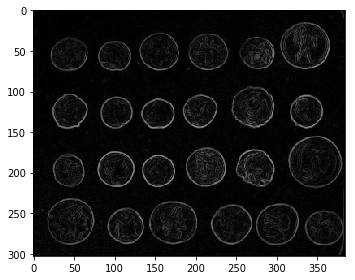

In [54]:
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

In [69]:
from skimage import data, io, filters

# ... or any other NumPy array!
image = io.imread('test.jpg')

image = image
image.shape

(132, 282, 3)

In [70]:
edges = filters.sobel(image)

ValueError: The parameter `image` must be a 2-dimensional array

In [43]:
io.imshow(edges)
io.imsave('test.jpg', edges)

ValueError: The parameter `image` must be a 2-dimensional array

{'audia6': 0, 'avanteold': 1, 'benzeclass': 2}
[[0.02681971 0.9715143  0.00166594]]


,audia6,avanteold,benzeclass
0,0.0268197,0.971514,0.00166594


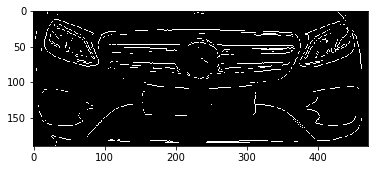

In [77]:
import cv2
from keras.preprocessing import image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(30, 60))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


new_image = load_image('test3.png')
pred = model.predict(new_image)
print(test_generator.class_indices)
print(pred)

import cv2
img = cv2.imread('test3.png')
plt.imshow(img)

import pandas as pd
#output = np.where(output <= 0.0009, 0, output)
df = pd.DataFrame(pred, columns = list(test_generator.class_indices.keys()))

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

df.style.apply(highlight_max, axis = 1)

df = df.reindex(df.idxmax(axis = 1).sort_values().index)
df = df.reset_index(drop = True)
df.style.apply(highlight_max, axis = 1)